In [1]:
#@title imports 
import os
import pickle
from typing import Set
# from jedi import settings
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.function_base import append 
import scipy.io as spio
from scipy.io import loadmat, savemat
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy.sparse import data 
import pandas as pd 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import SparsePCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap.plot as uplot
from sknetwork.clustering import Louvain,get_modularity
from sknetwork.data import karate_club
import sys 
sys.path.append('C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts')
from sknetwork.clustering import Louvain,get_modularity
from sknetwork.data import karate_club
from UMAP import *
pd.options.mode.use_inf_as_na = True

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarni

In [2]:
def plot_UMAP_clusters_single(data_inh, neighbours, distance, res_louvain, random_state,annotate=False,norm=True, c_list=None ,title=None,save=False):
    """plots UMAP for excitatory and inhibitory cells 

    Args:
        data_inh (ndarray): cell X feature matrix for inhibitory cells
        data_exc (ndarray): cell X feature matrix for excitatory cells
        c_exc (array): _description_
        c_inh (array): _description_
        neighbours (int): number of neares neighbours
        distance (float): minimum distance between points
    """
    data_umap_scaler = StandardScaler()
    data_umap = data_umap_scaler.fit_transform(data_inh)
    if norm:
        data_umap = normalize(data_umap)
    
    neighbours = neighbours
    dist = distance
    reducer = umap.UMAP(n_neighbors=neighbours,min_dist=dist,random_state=random_state)
    mapper = reducer.fit(data_umap)
    
    fig = plt.figure(figsize=[8,8])
    ax12d = fig.add_subplot(1,1,1)
    
    louvain = Louvain(resolution=res_louvain,random_state=random_state)
    adjacency = mapper.graph_
    labels_exc = louvain.fit_predict(adjacency)

    print(len(set(labels_exc)))
    clusterable_embedding2d = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_umap)



    df_2d_exc = {'UMAP1':clusterable_embedding2d[:, 0],
             'UMAP2':clusterable_embedding2d[:, 1],
             'class':labels_exc}

    ax12d.set_xticks([])
    ax12d.set_yticks([])

    sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',palette=c_list[:len(set(labels_exc))],ax=ax12d)
    if annotate:
        for i in range(len(clusterable_embedding2d)):

            plt.annotate(str(i),(clusterable_embedding2d[i,0]+0.05,clusterable_embedding2d[i,1]+0.05))

        # sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',ax=ax12d)

        # ax12d.set_title('UMAP clusters for excitatory neurons 2D')
        ax12d.legend()
    if save:
        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/exc_umap_cluster.png',dpi=200)
    if title!=None:
        plt.title(title)
    plt.show()

    return labels_exc,mapper,reducer

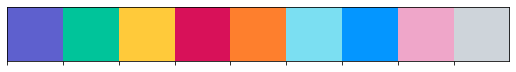

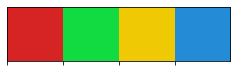

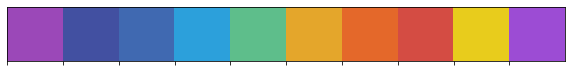

In [3]:
pal = ["#00202e","#003f5c","#2c4875","#8a508f","#bc5090","#ff6361","#ff8531","#ffa600","#ffd380"]
CUSTOM_PAL_SORT_3 = ['#5e60ce','#00c49a','#ffca3a','#D81159','#fe7f2d','#7bdff2','#0496ff','#efa6c9','#ced4da']
GMM_PAL = ['#d62424','#12db41','#f0c905','#248cd6']

# In RGB form
coherence_colors = [[0.609, 0.283, 0.724],
                    [0.259,	0.314, 0.635],
                    [0.251,	0.412, 0.698],
                    [0.176,	0.631, 0.859],
                    [0.369,	0.749, 0.549],
                    [0.898,	0.654, 0.169],
                    [0.898,	0.41 , 0.165],
                    [0.834,	0.3 , 0.265],
                    [0.912,	0.8 , 0.112],
                    [0.612,	0.3 , 0.834]]
sns.palplot(CUSTOM_PAL_SORT_3)
sns.palplot(GMM_PAL)
sns.palplot(coherence_colors)

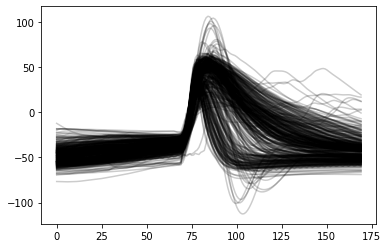

In [4]:
data_wave_FN = pd.read_pickle('D:/CurrentClamp/all_waveforms_entire.pkl')
data_wave_FN = data_wave_FN[data_wave_FN.cond.isin(['ACSF','aCSF'])]
# data_wave_FN_1 =data_wave_FN[data_wave_FN.trial=='0'] 
fig = plt.Figure(figsize=[10,10])
plt.plot(np.vstack(data_wave_FN['waveforms']).T,c='k',alpha=0.2)
plt.show()

# data_wave_FN_1


2


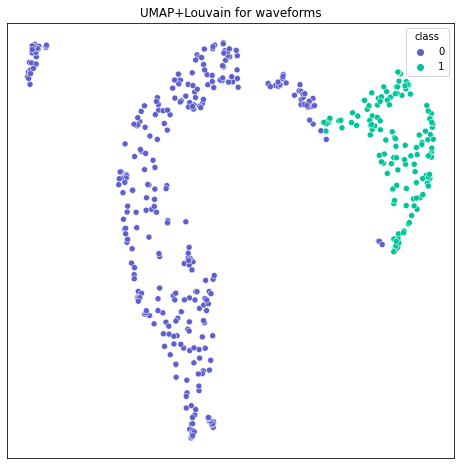

In [5]:
waves = normalize(np.vstack(data_wave_FN['waveforms']))
lables_wave,mapper,reducer = plot_UMAP_clusters_single(waves,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 0.1,
                          c_list =CUSTOM_PAL_SORT_3,
                          title='UMAP+Louvain for waveforms'
                          )

0 309


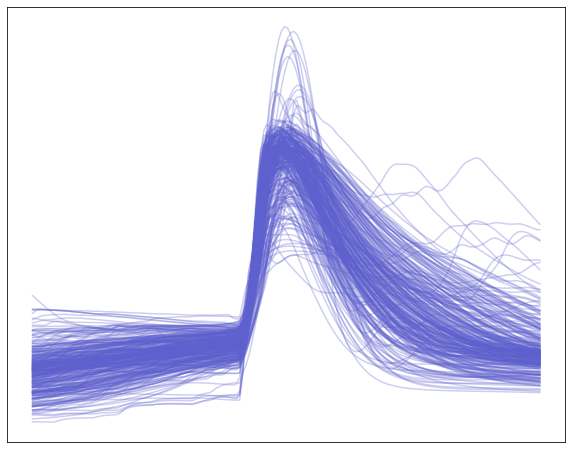

1 133


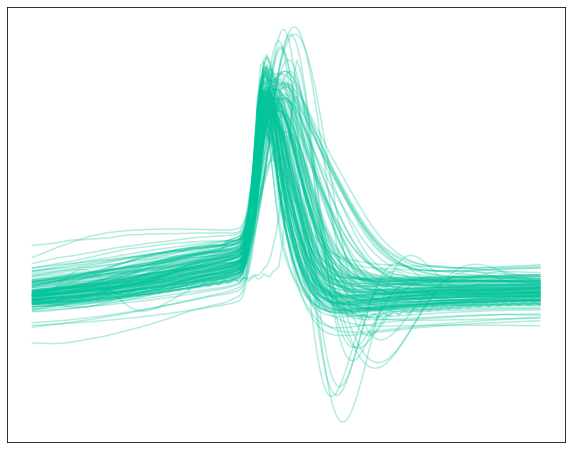

In [6]:
data_wave_FN['waveform_lables'] = lables_wave
for i in set(data_wave_FN['waveform_lables']):
    plt.figure(figsize=[10,8])
    print(i,len(np.vstack(data_wave_FN[data_wave_FN['waveform_lables']==i]['waveforms'])))
    plt.plot(np.vstack(data_wave_FN[data_wave_FN['waveform_lables']==i]['waveforms']).T,c=CUSTOM_PAL_SORT_3[i],alpha=0.3)
    plt.xticks([])
    plt.yticks([])
    plt.show()


Clusters for STAs

8


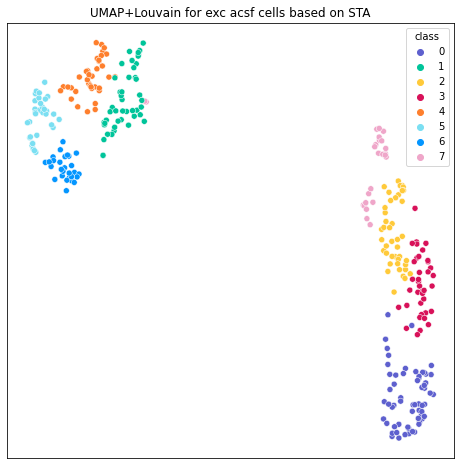

6


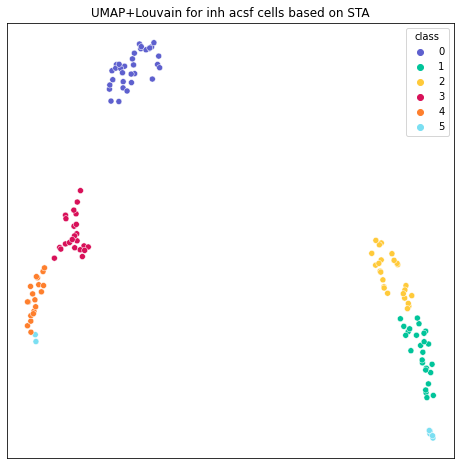

In [162]:
stas = pd.read_pickle("D:/CurrentClamp/all_stas_entire.pkl")
stas = stas[stas.cond.isin(['ACSF','aCSF'])]

stas['lables_wave'] = lables_wave
# stas = stas[stas.trial=='0'] 
sta_norm_exc = np.vstack(stas[stas.lables_wave==0]['sta'])
sta_norm_inh = np.vstack(stas[stas.lables_wave==1]['sta'])

lables_sta_exc,mapper,reducer = plot_UMAP_clusters_single(sta_norm_exc[:,60*20:],
                          20,
                          0.1,
                          random_state =30,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          title='UMAP+Louvain for exc acsf cells based on STA',
                        #   norm=True
                          )

lables_sta_inh,mapper,reducer = plot_UMAP_clusters_single(sta_norm_inh[:,60*20:],
                          20,
                          0.1,
                          random_state =30,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          title='UMAP+Louvain for inh acsf cells based on STA',
                        #   norm=True
                          )


In [164]:
sta_exc = stas[stas.lables_wave==0]
sta_exc['lv_lables']= lables_sta_exc
sta_inh = stas[stas.lables_wave==1]
sta_inh['lv_lables']= lables_sta_inh
len(lables_sta_exc)
sta_exc

<ipython-input-164-ae7aec8ef43c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sta_exc['lv_lables']= lables_sta_exc
<ipython-input-164-ae7aec8ef43c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sta_inh['lv_lables']= lables_sta_inh


,sta,cond,exp_name,trial,lables_wave,lv_lables
3,"[86.31903, 85.33715, 88.141655, 91.20879, 91.5...",ACSF,asli_11-7-19_E1,0,0,3
6,"[59.25217, 58.947937, 58.6599, 63.308147, 63.3...",ACSF,asli_11-7-19_E2,0,0,0
20,"[119.88344, 119.591866, 120.12168, 120.286835,...",ACSF,asli_2-8-19_E1,0,0,3
29,"[19.45728, 20.053717, 19.677969, 19.600706, 20...",ACSF,asli_23-7-19_E2,0,0,2
32,"[30.310383, 30.6092, 28.994658, 29.969446, 30....",ACSF,asli_23-7-19_E3,0,0,2
...,...,...,...,...,...,...
829,"[81.22951, 80.81927, 80.41311, 80.01099, 82.76...",ACSF,xuan_8-5-19_E5,0,0,0
834,"[-62.803715, -62.98043, -62.74973, -62.522808,...",ACSF,xuan_9-1-19_E4,0,0,5
835,"[-70.78967, -70.93184, -70.46763, -70.23433, -...",ACSF,xuan_9-1-19_E4,1,0,5
841,"[67.05647, 66.837006, 66.5469, 70.116516, 70.7...",ACSF,xuan_9-5-19_E4,0,0,2


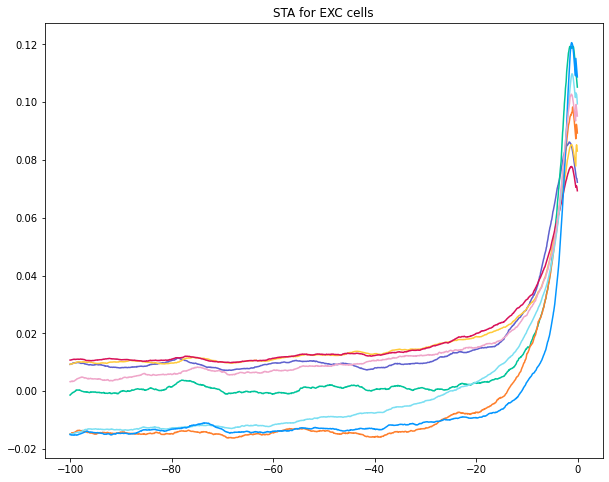

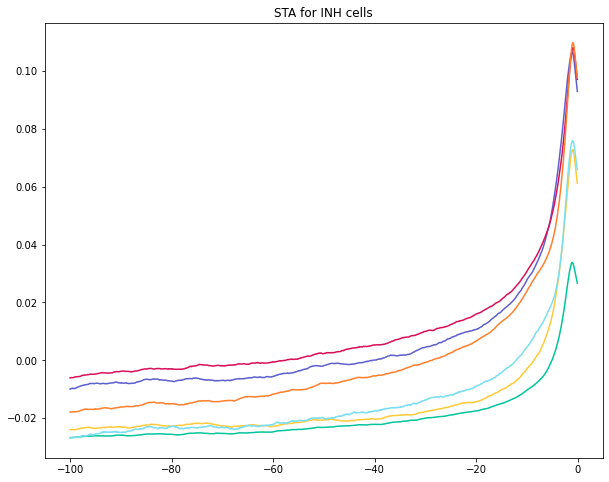

In [174]:
plt.figure(figsize=[10,8])

for i in set(sta_exc['lv_lables']):
    mean_sta = np.mean(np.vstack(sta_exc[sta_exc['lv_lables']==i]['sta']).T,axis=1)
    mean_sta = mean_sta/np.linalg.norm(mean_sta,ord=2)
    plt.plot(np.arange(-100,0,1/20),mean_sta,c=CUSTOM_PAL_SORT_3[i])
    # plt.ylim([-200,900])
    # plt.xticks([])
    # plt.yticks([])
plt.title('STA for EXC cells')
plt.show()
plt.figure(figsize=[10,8])
for i in set(sta_inh['lv_lables']):
    mean_sta = np.mean(np.vstack(sta_inh[sta_inh['lv_lables']==i]['sta']).T,axis=1)
    mean_sta = mean_sta/np.linalg.norm(mean_sta,ord=2)
    plt.plot(np.arange(-100,0,1/20),mean_sta,c=CUSTOM_PAL_SORT_3[i])
    # plt.ylim([-200,900])
    # plt.xticks([])
    # plt.yticks([])
plt.title('STA for INH cells')

plt.show()

In [78]:
data_ephys = pd.read_pickle('D:/CurrentClamp/all_ephys_entire.pkl')
data_ephys = data_ephys[data_ephys.cond.isin(['aCSF','ACSF'])]
data_ephys = data_ephys[data_ephys.exp_name.isin(data_wave_FN.exp_name)]
data_ephys['lables_wave'] = lables_wave


8


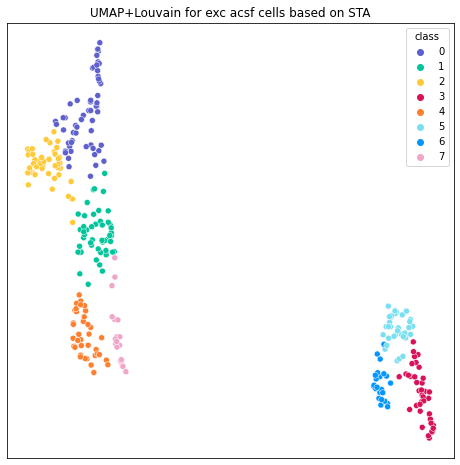

6


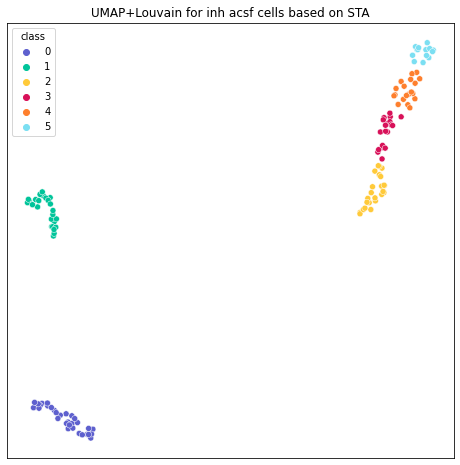

In [156]:
stas_h = pd.read_pickle("D:/CurrentClamp/all_stas_hidden.pkl")
stas_h = stas_h[stas_h.cond.isin(['ACSF','aCSF'])]

stas_h['lables_wave'] = lables_wave
# stas_h = stas_h[stas_h.trial=='0'] 
sta_norm_h_exc = np.vstack(stas_h[stas_h.lables_wave==0]['sta'])
sta_norm_h_inh = np.vstack(stas_h[stas_h.lables_wave==1]['sta'])

lables_sta_h_exc,mapper,reducer = plot_UMAP_clusters_single(sta_norm_h_exc[:,60*20:],
                          20,
                          0.1,
                          random_state =30,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          title='UMAP+Louvain for exc acsf cells based on STA',
                        #   norm=True
                          )

lables_sta_h_inh,mapper,reducer = plot_UMAP_clusters_single(sta_norm_h_inh[:,60*20:],
                          20,
                          0.1,
                          random_state =30,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          title='UMAP+Louvain for inh acsf cells based on STA',
                        #   norm=True
                          )


In [165]:
sta_h_exc = stas_h[stas_h.lables_wave==0]
sta_h_exc['lv_lables']= lables_sta_h_exc
sta_h_inh = stas_h[stas_h.lables_wave==1]
sta_h_inh['lv_lables']= lables_sta_h_inh


<ipython-input-165-624c131a21a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sta_h_exc['lv_lables']= lables_sta_h_exc
<ipython-input-165-624c131a21a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sta_h_inh['lv_lables']= lables_sta_h_inh


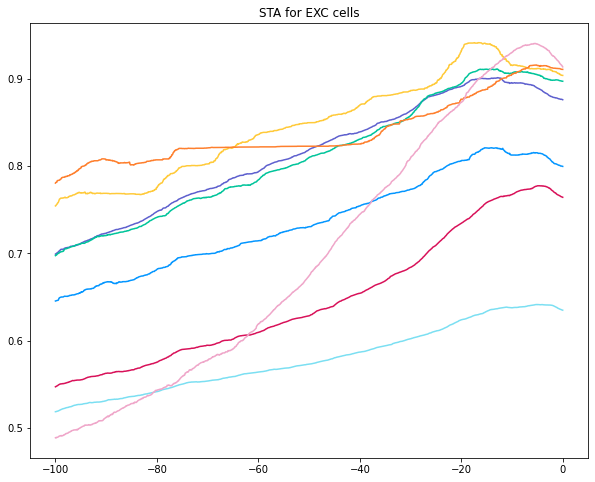

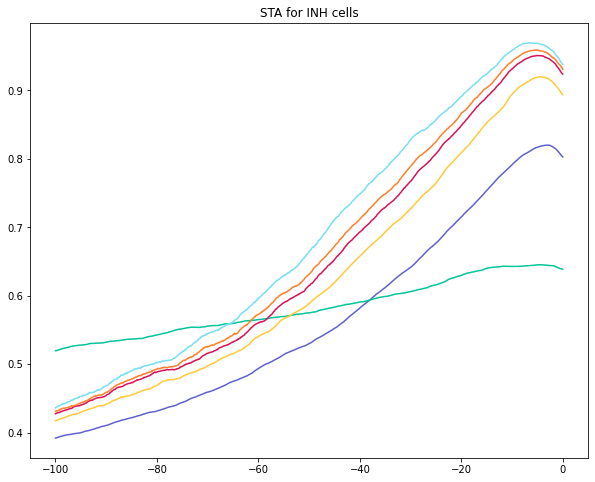

In [166]:
plt.figure(figsize=[10,8])

for i in set(sta_h_exc['lv_lables']):
    plt.plot(np.arange(-100,0,1/20),np.mean(np.vstack(sta_h_exc[sta_h_exc['lv_lables']==i]['sta']).T,axis=1),c=CUSTOM_PAL_SORT_3[i])
    # plt.ylim([-200,900])
    # plt.xticks([])
    # plt.yticks([])
plt.title('STA for EXC cells')
plt.show()
plt.figure(figsize=[10,8])
for i in set(sta_h_inh['lv_lables']):
    plt.plot(np.arange(-100,0,1/20),np.mean(np.vstack(sta_h_inh[sta_h_inh['lv_lables']==i]['sta']).T,axis=1),c=CUSTOM_PAL_SORT_3[i])
    # plt.ylim([-200,900])
    # plt.xticks([])
    # plt.yticks([])
plt.title('STA for INH cells')

plt.show()

<ipython-input-171-ade91221d902>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sta_h_exc['labels_sta'] = sta_exc['lv_lables']
<ipython-input-171-ade91221d902>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sta_h_inh['labels_sta'] = sta_inh['lv_lables']


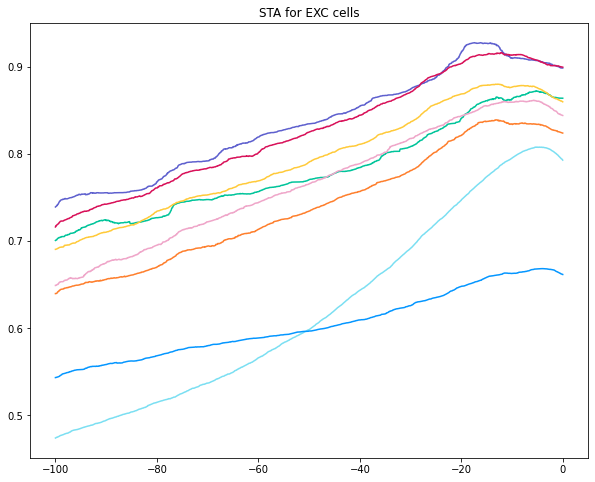

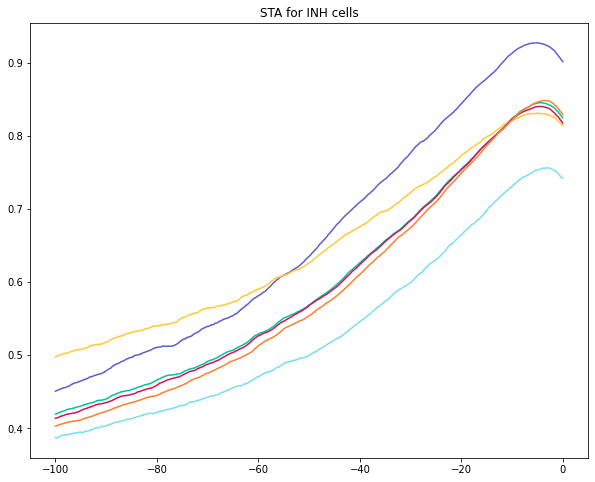

In [171]:
sta_h_exc['labels_sta'] = sta_exc['lv_lables']
sta_h_inh['labels_sta'] = sta_inh['lv_lables']

plt.figure(figsize=[10,8])

for i in set(sta_h_exc['labels_sta']):
    plt.plot(np.arange(-100,0,1/20),np.mean(np.vstack(sta_h_exc[sta_h_exc['labels_sta']==i]['sta']).T,axis=1),c=CUSTOM_PAL_SORT_3[i])
    # plt.ylim([-200,900])
    # plt.xticks([])
    # plt.yticks([])
plt.title('STA for EXC cells')
plt.show()
plt.figure(figsize=[10,8])
for i in set(sta_h_inh['labels_sta']):
    plt.plot(np.arange(-100,0,1/20),np.mean(np.vstack(sta_h_inh[sta_h_inh['labels_sta']==i]['sta']).T,axis=1),c=CUSTOM_PAL_SORT_3[i])
    # plt.ylim([-200,900])
    # plt.xticks([])
    # plt.yticks([])
plt.title('STA for INH cells')

plt.show()

Louvain clusters for ephys properties

8


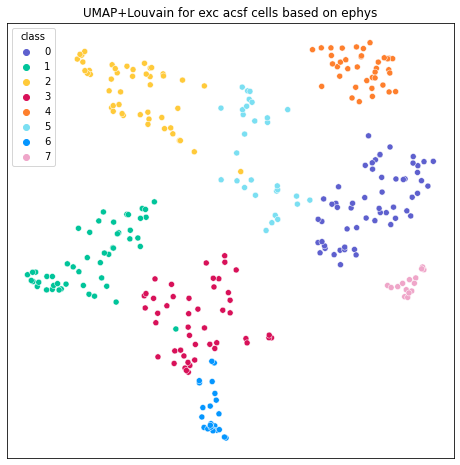

6


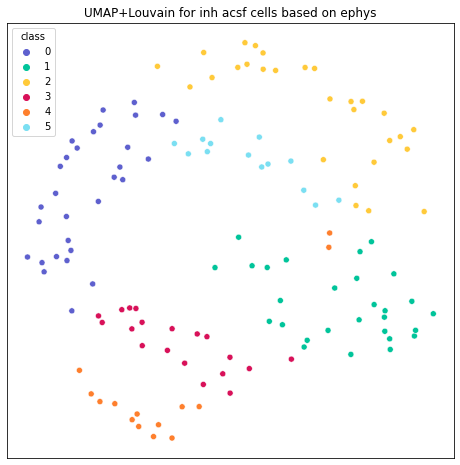

In [79]:
data_ephys= data_ephys.dropna(axis=0)

# data_ephys = data_ephys[data_ephys.trialnr==0] 
data_ephys_exc = data_ephys[data_ephys.lables_wave==0]
# data_ephys_exc = data_ephys_exc[data_ephys_exc.columns[:-4]]
data_ephys_inh = data_ephys[data_ephys.lables_wave==1]
# data_ephys_inh = data_ephys_inh[data_ephys_inh.columns[:-4]]

lables_ephys_exc,mapper,reducer = plot_UMAP_clusters_single(data_ephys_exc[data_ephys_exc.columns[:-4]].to_numpy(),
                          20,
                          0.1,
                          random_state =30,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          title='UMAP+Louvain for exc acsf cells based on ephys',
                        #   norm=True,
                          )
lables_ephys_inh,mapper,reducer = plot_UMAP_clusters_single(data_ephys_inh[data_ephys_inh.columns[:-4]].to_numpy(),
                          20,
                          0.1,
                          random_state =30,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          title='UMAP+Louvain for inh acsf cells based on ephys',
                        #   norm=True,

                          )

<ipython-input-143-b53061fdd162>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ephys_exc['labels_ephys'] = lables_ephys_exc


<Axes: >

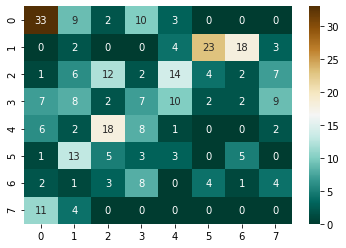

In [143]:
data_ephys_exc['labels_ephys'] = lables_ephys_exc
data_ephys_exc_ = data_ephys_exc[data_ephys_exc.exp_name!='xuan_28-3-19_E4']

# sta_exc['labels_ephys'] = lables_ephys_exc
sta_exc_ = sta_exc[sta_exc.exp_name!='xuan_28-3-19_E4']


df = pd.DataFrame(columns=['exp_name','labels_ephys','labels_sta'])
df['exp_name'] = data_ephys_exc_.exp_name

df['labels_ephys'] = np.array(data_ephys_exc_.labels_ephys)
sta_mat = np.zeros((8,8))
df.loc[:,'labels_sta'] = np.array(sta_exc_['lv_lables'])
for i in np.unique(df.labels_ephys):
    data_ = np.unique(df[df.labels_ephys==i]['labels_sta'],return_counts=True)
    sta_mat[i,data_[0]] =data_[1] 
sns.heatmap(sta_mat,cmap='BrBG_r',annot=True)    

use random seed: 42
Shape of Raw data
Dataset 0: (308, 22)
Dataset 1: (309, 2000)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[100/500] err:5.1608 alpha:17.3931
epoch:[200/500] err:2.6452 alpha:10.6911
epoch:[300/500] err:2.3543 alpha:11.5729
epoch:[400/500] err:2.2695 alpha:11.9807
epoch:[500/500] err:2.2280 alpha:12.2463
Finished Matching!
---------------------------------
Begin finding the embedded space
epoch:[10/100]: loss:2.000735, align_loss:0.210289
epoch:[20/100]: loss:1.804835, align_loss:0.208915
epoch:[30/100]: loss:1.970939, align_loss:0.217477
epoch:[40/100]: loss:1.916670, align_loss:0.232683
epoch:[50/100]: loss:1.771435, align_loss:0.218690
epoch:[60/100]: loss:1.698474, align_loss:0.230987
epoch:[70/100]: loss:1.441681, align_loss:0.223082
epoch:[80/100]: loss:1.500142, align_loss:0.224576
epoch:[90/100]: loss:1.776173, align_loss:0.227085
epoch:[100/100]: loss:1.590735, align_loss:0.221238
Done
---------

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\unioncom\visualization.py:127: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(embedding[i][:,0], embedding[i][:,1], c=color[i], s=5., alpha=0.8)


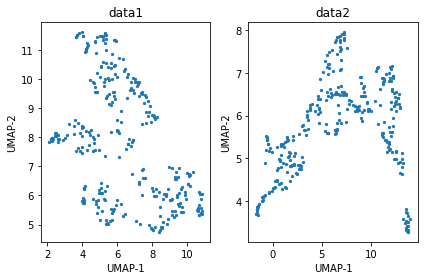

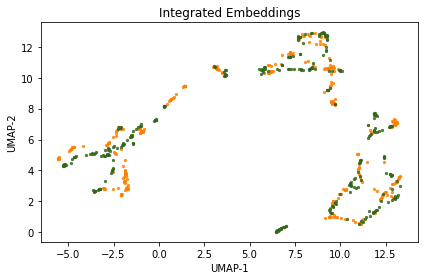

In [30]:
from unioncom import UnionCom
# import numpy as np

data_scaler = StandardScaler()

data1_exc = data_ephys_exc[data_ephys_exc.columns[:-5]]
data1_exc = data_scaler.fit_transform(np.vstack(data1_exc.to_numpy()))

data2_exc = sta_exc['sta']
data2_exc = data_scaler.fit_transform(np.vstack(data2_exc.to_numpy()))

uc = UnionCom.UnionCom(project_mode='tsne',output_dim=20,manual_seed=42,epoch_pd=500, epoch_DNN=100)
integrated_data = uc.fit_transform(dataset=[data1_exc,data2_exc])
# uc.test_LabelTA(integrated_data, [labels_fn_exc,labels_cc_exc])
uc.Visualize([data1_exc,data2_exc], integrated_data, mode='UMAP') # without datatype

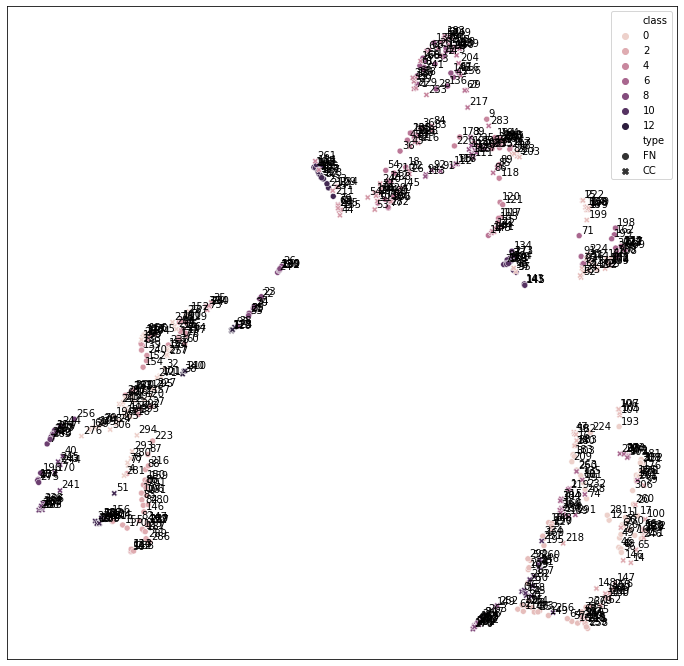

In [33]:
data_umapFN = integrated_data[0]
data_umapCC = integrated_data[1]
data_umap_combined = np.vstack([integrated_data[0],integrated_data[1]])


fig = plt.figure(figsize=[12,12])
ax12d = fig.add_subplot(1,1,1)
random_state =42
neighbours = 20
dist = .1
res_louvain = 1.

reducer = umap.UMAP(n_neighbors=neighbours,min_dist=dist,random_state=random_state)

mapperFN = reducer.fit(data_umapFN)
louvain = Louvain(resolution=res_louvain,random_state=random_state)
adjacency = mapperFN.graph_
labels_fn_red_exc = louvain.fit_predict(adjacency)

mapperCC = reducer.fit(data_umapCC)
louvain = Louvain(resolution=res_louvain,random_state=random_state)
adjacency = mapperCC.graph_
labels_cc_red_exc = louvain.fit_predict(adjacency)

clusterable_embedding2d = reducer.fit_transform(data_umap_combined)    

labels_fn_exc,labels_cc_exc = lables_ephys_exc,lables_sta_exc
df_2d_exc_fn = {'UMAP1':clusterable_embedding2d[:, 0],
            'UMAP2':clusterable_embedding2d[:, 1],
            'class':np.concatenate([labels_fn_red_exc,labels_cc_red_exc]),
            'type':np.concatenate([np.repeat('FN',len(labels_fn_red_exc)),np.repeat('CC',len(labels_cc_red_exc))])}


ax12d.set_xticks([])
ax12d.set_yticks([])
markers = {'CC':'*','FN':'o'}
# sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',palette=c_list[:len(set(labels_exc))],ax=ax12d)
# ,palette=CUSTOM_PAL_SORT_3[:max(len(set(labels_fn_red_exc)),len(set(labels_cc_red_exc)))]
sns.scatterplot(data=df_2d_exc_fn,x='UMAP1',y='UMAP2',hue='class',style='type',ax=ax12d)
for i in range(len(clusterable_embedding2d)):
    if i<len(data_umapFN):
        plt.annotate(str(i),(clusterable_embedding2d[i,0]+0.05,clusterable_embedding2d[i,1]+0.05))
    else:
        plt.annotate(str(i-len(data_umapFN)),(clusterable_embedding2d[i,0]+0.05,clusterable_embedding2d[i,1]+0.05))


# ax12d.set_title('UMAP clusters for excitatory neurons 2D')
ax12d.legend()


In [34]:
df_exc = pd.DataFrame(columns=['FN_ID','STA_ID','Cluster_ID_FN','Cluster_ID_STA'])
df_exc['FN_ID'] = np.arange(1,len(data_umapFN)+1)
df_exc['CC_ID'] = np.arange(1,len(data_umapCC)+1)
df_exc['Cluster_ID_FN'] = labels_fn_red_exc
df_exc['Cluster_ID_STA'] = labels_cc_red_exc


ValueError: Length of values (309) does not match length of index (308)